<a href="https://colab.research.google.com/github/jongyun3300/IT-BUSINESS-INNOVATION/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_classification_assignment_health_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오.

##(0) 데이터 탐색

In [1]:
#모델 및 라이브러리 삽입
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

#데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB_22/ITB_data/health_data.csv', encoding='UTF-8')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
#결측치 제거
for col in data.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column:    가입자일련번호	 Percent of NaN Value: 0.00%
column:       시도코드	 Percent of NaN Value: 0.00%
column:       성별코드	 Percent of NaN Value: 0.00%
column: 연령대코드(5세단위)	 Percent of NaN Value: 0.00%
column:  신장(5Cm단위)	 Percent of NaN Value: 0.00%
column: 체중(5Kg 단위)	 Percent of NaN Value: 0.00%
column:       허리둘레	 Percent of NaN Value: 0.00%
column:      시력(좌)	 Percent of NaN Value: 0.00%
column:      시력(우)	 Percent of NaN Value: 0.00%
column:      청력(좌)	 Percent of NaN Value: 0.00%
column:      청력(우)	 Percent of NaN Value: 0.00%
column:      수축기혈압	 Percent of NaN Value: 0.88%
column:      이완기혈압	 Percent of NaN Value: 0.88%
column: 식전혈당(공복혈당)	 Percent of NaN Value: 0.88%
column:     총콜레스테롤	 Percent of NaN Value: 59.56%
column:   트리글리세라이드	 Percent of NaN Value: 59.56%
column:   HDL콜레스테롤	 Percent of NaN Value: 59.56%
column:   LDL콜레스테롤	 Percent of NaN Value: 60.23%
column:        혈색소	 Percent of NaN Value: 0.88%
column:        요단백	 Percent of NaN Value: 1.39%
column:    혈청크레아티닌	 Percent of NaN 

##(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택
*   종속/독립 변수 선택
*   범주형, 연속형 데이터를 나누어 전처리 후 train, test set으로 나누기



기존의 시각화 과제에서는 음주여부와 간수치의 상관관계를 확인하였으나, 동일한 독립변수를 이용하기에는 결측치가 너무 많고, 갯수가 너무 적은 것을 고려하였다. 따라서 기존의 데이터 중에서 결측치가 상대적으로 많은 데이터를 제외한 모든 변수를 독립 변수로 지정하였다.

*   **feature독립변수**: '연령대코드(5세단위)''신장(5Cm단위)', '체중(5Kg 단위)','허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압','식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피'
*   **label종속변수**: 음주여부

In [3]:
#범주형, 연속형 데이터 나누기
X1=data[['시도코드','성별코드','흡연상태','구강검진수검여부']]
X2=data[['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']]
y=data[['음주여부']]
y['음주여부'] = y['음주여부'].replace(['No','Yes'], [0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
#범주형 데이터: 원핫인코딩
X1['시도코드'][X1['시도코드'] == 11] = '서울'
X1['시도코드'][X1['시도코드'] == 26] = '부산'
X1['시도코드'][X1['시도코드'] == 27] = '대구'
X1['시도코드'][X1['시도코드'] == 28] = '인천'
X1['시도코드'][X1['시도코드'] == 29] = '광주'
X1['시도코드'][X1['시도코드'] == 30] = '대전'
X1['시도코드'][X1['시도코드'] == 31] = '울산'
X1['시도코드'][X1['시도코드'] == 36] = '세종'
X1['시도코드'][X1['시도코드'] == 41] = '경기'
X1['시도코드'][X1['시도코드'] == 42] = '강원'
X1['시도코드'][X1['시도코드'] == 43] = '충북'
X1['시도코드'][X1['시도코드'] == 44] = '충남'
X1['시도코드'][X1['시도코드'] == 45] = '전북'
X1['시도코드'][X1['시도코드'] == 46] = '전남'
X1['시도코드'][X1['시도코드'] == 47] = '경북'
X1['시도코드'][X1['시도코드'] == 48] = '경남'
X1['시도코드'][X1['시도코드'] == 49] = '제주'
X1['구강검진수검여부'] = X1['구강검진수검여부'].replace([0,1], ['No','Yes'])
X1_dum=pd.get_dummies(X1)

#연속형 데이터: 정규화 스케일링
scaler2=StandardScaler()
scaler2.fit(X2)
X_scaled2=scaler2.transform(X2)
X_scaled=pd.DataFrame(X_scaled2)
X_scaled.columns=['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

#자료 통합
f=pd.concat([X1_dum, X_scaled, y], axis=1)
fsmoke=f.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing im

In [5]:
#test, train set 구분하기
X=fsmoke[['시도코드_강원', '시도코드_경기', '시도코드_경남', '시도코드_경북', '시도코드_광주', '시도코드_대구',
       '시도코드_대전', '시도코드_부산', '시도코드_서울', '시도코드_세종', '시도코드_울산', '시도코드_인천',
       '시도코드_전남', '시도코드_전북', '시도코드_제주', '시도코드_충남', '시도코드_충북', '성별코드_F',
       '성별코드_M', '흡연상태_No', '흡연상태_NotNow', '흡연상태_Yes', '구강검진수검여부_No',
       '구강검진수검여부_Yes', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']]
y=fsmoke[['음주여부']]

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

## (2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 

In [6]:
#모델 삽입
models = {}

from sklearn.tree import DecisionTreeClassifier 
models['Decision Trees'] = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier 
models['Gradient Boosting'] = GradientBoostingClassifier()

#모델별 F1 Score,	Accuracy,	Precision,	Recall
accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    models[key].fit(X_train, np.ravel(y_train)) # Fit the classifier
    y_pred = models[key].predict(X_test) # Make predictions
    accuracy[key] = accuracy_score(y_pred, y_test) # Calculate metrics
    precision[key] = precision_score(y_pred, y_test)
    recall[key] = recall_score(y_pred, y_test)
    f1[key] = f1_score(y_pred, y_test)
    
df_model = pd.DataFrame(index=models.keys(), columns=['F1 Score', 'Accuracy', 'Precision', 'Recall'])
df_model['F1 Score'] = f1.values()
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,F1 Score,Accuracy,Precision,Recall
Decision Trees,0.689631,0.638134,0.684865,0.694464
Random Forest,0.769231,0.710345,0.822391,0.722526
Gradient Boosting,0.778715,0.723327,0.829302,0.733945


In [7]:
#가장 정확도 높은 gradient boosting에서 parameter tunning
parameters = {'max_depth':[1,2,3,4,5], 'learning_rate':[ 0.10, 0.08, 0.06, 0.04, 0.02]}

init_gbrt = GradientBoostingClassifier(random_state=42)
init_gbrt.fit(X_train, y_train)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True) 
grid_gbrt.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
scores_df.sort_values(by=['rank_test_score'],ascending=[True])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
22,1.820009,0.461076,0.014328,0.006746,0.02,3,"{'learning_rate': 0.02, 'max_depth': 3}",0.728195,0.727789,0.705882,0.720622,0.010424,1
17,1.171485,0.009418,0.009859,0.001447,0.04,3,"{'learning_rate': 0.04, 'max_depth': 3}",0.721704,0.726978,0.707505,0.718729,0.008223,2
16,0.817828,0.007245,0.007818,0.000381,0.04,2,"{'learning_rate': 0.04, 'max_depth': 2}",0.726166,0.728195,0.701420,0.718594,0.012172,3
1,0.825222,0.002100,0.007048,0.000151,0.1,2,"{'learning_rate': 0.1, 'max_depth': 2}",0.720892,0.726572,0.707099,0.718188,0.008176,4
6,0.826397,0.014862,0.007184,0.000321,0.08,2,"{'learning_rate': 0.08, 'max_depth': 2}",0.722110,0.723327,0.707505,0.717647,0.007189,5
2,1.173786,0.006280,0.007826,0.000167,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",0.714402,0.723732,0.714402,0.717512,0.004399,6
21,0.825724,0.009013,0.008239,0.000174,0.02,2,"{'learning_rate': 0.02, 'max_depth': 2}",0.721298,0.728195,0.702637,0.717377,0.010796,7
12,1.173274,0.001179,0.008435,0.000082,0.06,3,"{'learning_rate': 0.06, 'max_depth': 3}",0.720892,0.726572,0.703448,0.716971,0.009839,8
11,0.825672,0.002566,0.007325,0.000117,0.06,2,"{'learning_rate': 0.06, 'max_depth': 2}",0.724544,0.724544,0.701420,0.716836,0.010901,9
5,0.461228,0.005008,0.005978,0.000326,0.08,1,"{'learning_rate': 0.08, 'max_depth': 1}",0.717241,0.726978,0.703043,0.715754,0.009828,10


In [9]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.7206
시험용 데이터 세트 정확도: 0.713


##(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등 

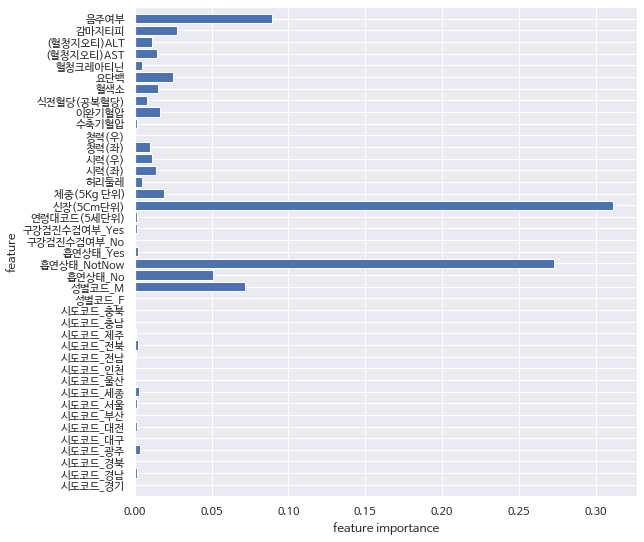

In [14]:
def plot_feature_importances_fsmoke(model):
    plt.rcParams["figure.figsize"] = (9,9) 
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(fsmoke.columns[1:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fsmoke.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_fsmoke(init_gbrt)



*   가장 먼저 의사결정나무, 랜덤포레스트, 그래디언트 부스팅의 f1 score, accuracy, precision, recall의 값을 표로 나타내어 보았다.
랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하여 오차를 줄이는 방식으로 나무를 생성하는 그래디언트 부스팅이 예상대로 가장 좋은 정확도를 보였다. 

*   이에 따라서 그래디언트 부스팅 모델에서 max depth, learning rate를 조절하여 최적의 파라메터를 구하는 과정을 걸쳤다. 추가적으로 cv 값도 5 등으로 변경해보았으나, 3일때 가장 좋은 결과를 얻었다. (모델의 기본값들도 가장 높은 확률로 베스트 파라미터를 얻을 수 있게 세팅 되어 있으니 특이점이 있는 데이터가 아니라면 그 근방에서 best parameter 값이 나오는 것 같다.)
rank test 결과를 기준으로 정렬하여 보니 max depth가 3, learning 0.02일때 테스트 데이터 세트 정확도가 0.713으로 나왔다. 

*   중요도가 높은 변수를 살펴보았을 때, 가장 관련이 있던 것은 바로 신장 데이터였다. 해당 데이터의 중요도가 높게 나온 이유는, 주로 음주 여부가 성인 남성에게 조금 더 치우쳐 있는 것으로 보이는데, 신장이 작은 경우 대부분의 미성년자들과 일부 여성이 포함되어서로 추측할 수 있다. (남성의 비율이 높은 것은 변수 중요도 그래프에서도 확인할 수 있다.)

